# IMPORTS

## Libraries

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt

## Loading Data

In [2]:
dfRaw = pd.read_csv('../../01-Data/Results/01-FirstRoundCRISP/dfFeatureEngineering.csv', low_memory=False, parse_dates=['Date'])

# EXPLORATORY DATA ANALYSIS

In [3]:
dfRaw1 = dfRaw.copy()

## Univariate Analysis

### Response Univariate

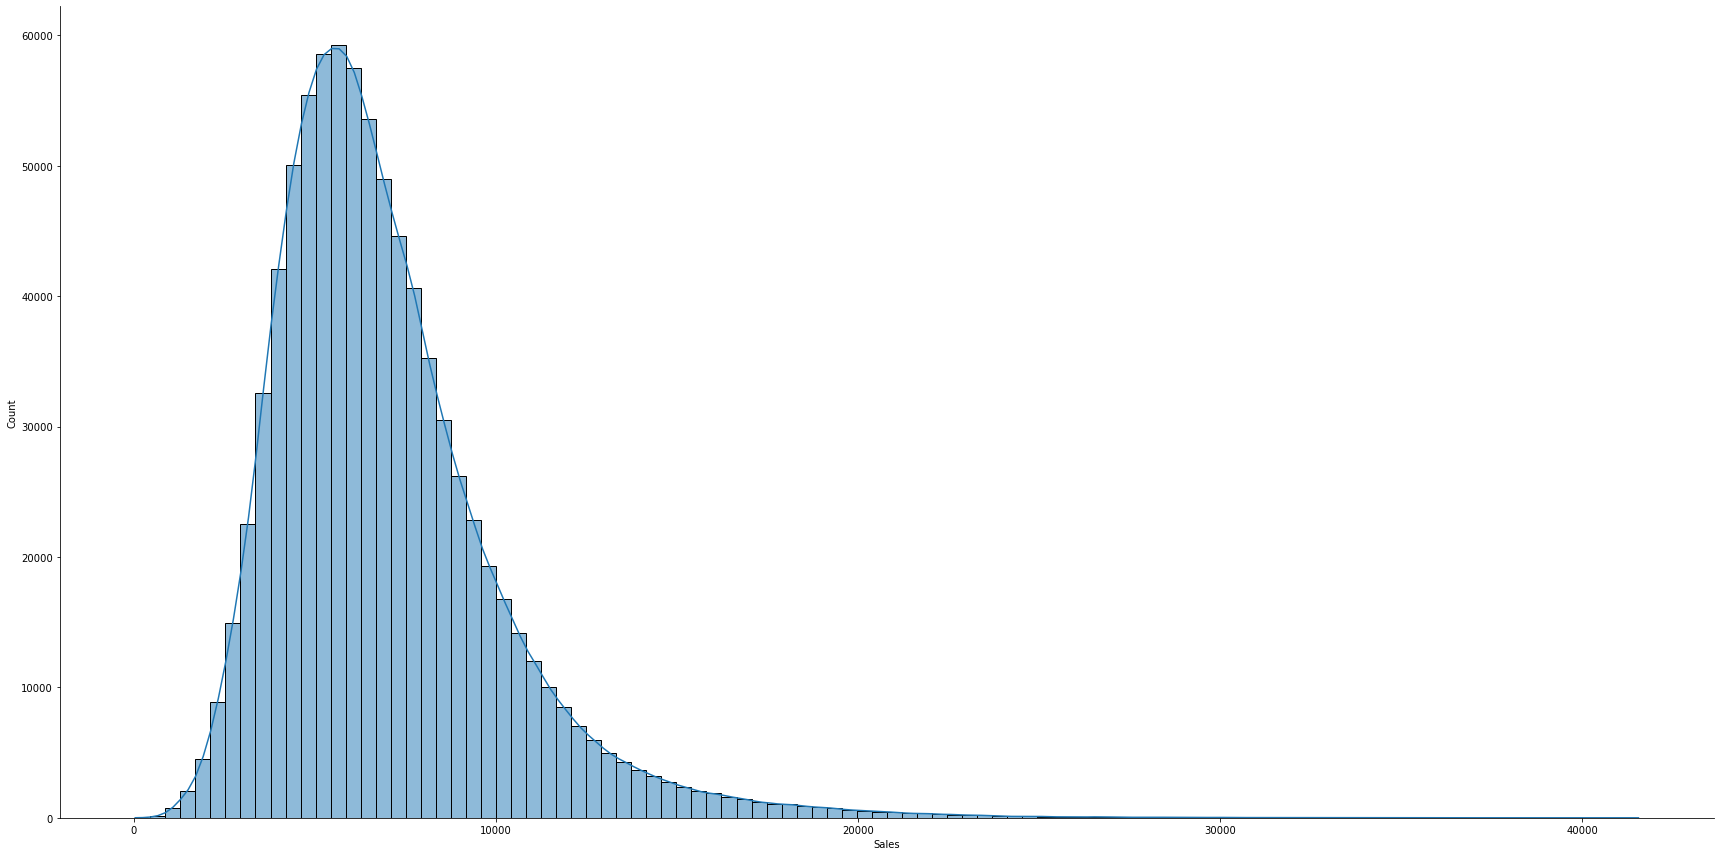

In [4]:
sns.displot(dfRaw1['Sales'], height=12, aspect=2, bins=100, kde=True)

### Numerical Variable

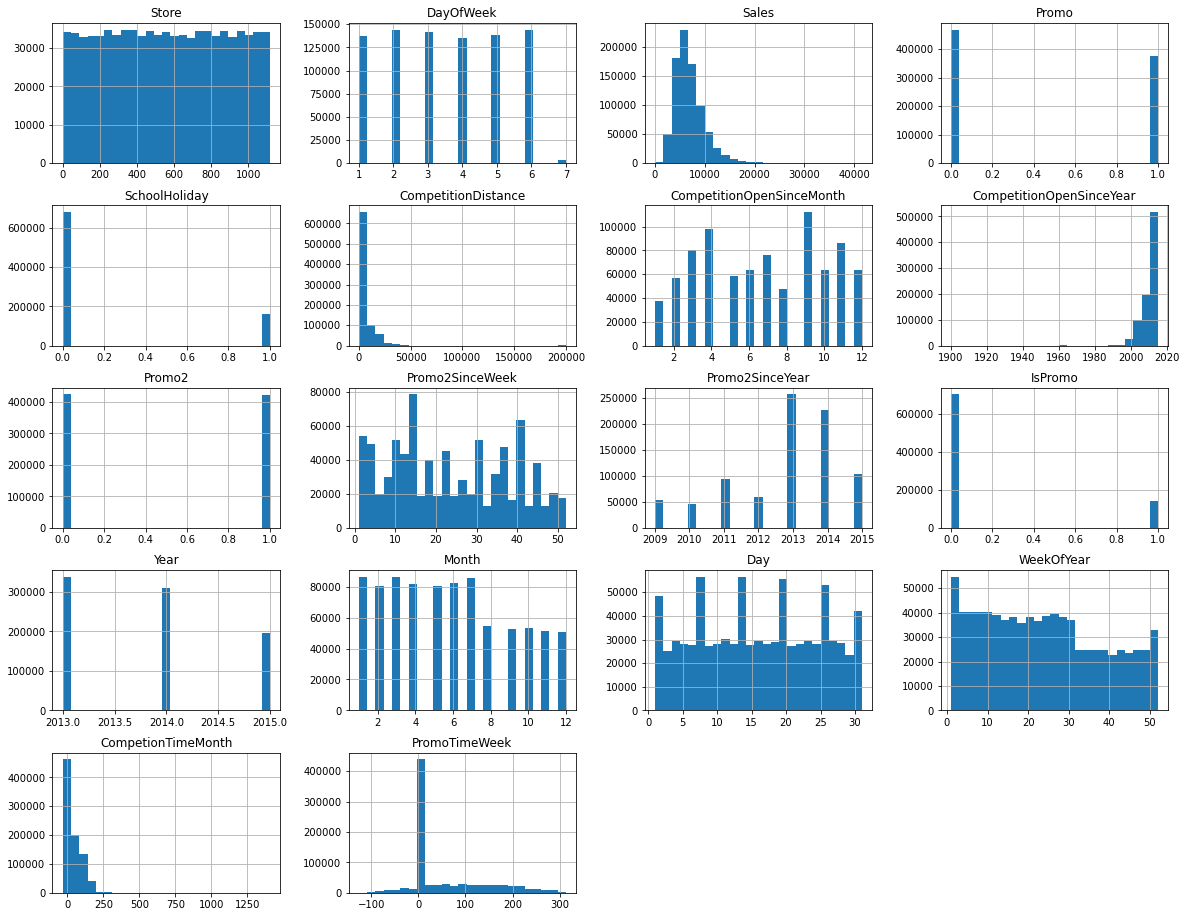

In [5]:
numAttributes = dfRaw1.select_dtypes(include=['int64', 'float64'])
numAttributes.hist(bins=25, figsize=(20,16))
plt.show()

### Categorical Variable

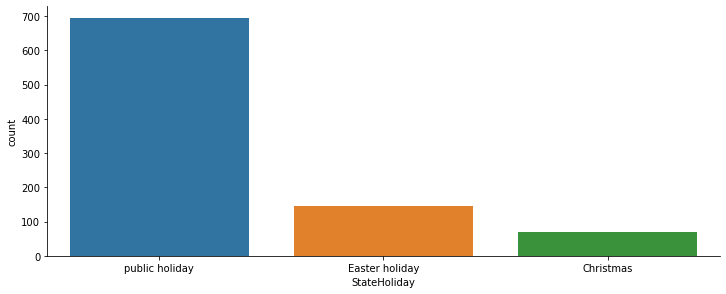

In [6]:
# State Holiday

dfRaw2 = dfRaw1[dfRaw1['StateHoliday'] != 'Regular Day']
sns.catplot(x='StateHoliday', kind='count', data=dfRaw2, height=4, aspect=2.5)
plt.show()

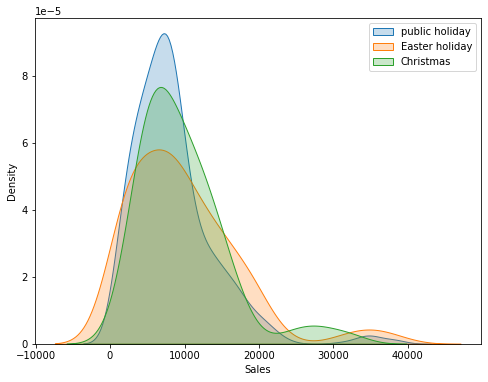

In [7]:
# State Holiday

plt.figure(figsize=(8,6))
sns.kdeplot(dfRaw1[dfRaw1['StateHoliday'] == 'public holiday']['Sales'], label='public holiday', shade=True)
sns.kdeplot(dfRaw1[dfRaw1['StateHoliday'] == 'Easter holiday']['Sales'], label='Easter holiday', shade=True)
sns.kdeplot(dfRaw1[dfRaw1['StateHoliday'] == 'Christmas']['Sales'], label='Christmas', shade=True)
plt.legend()

plt.show()

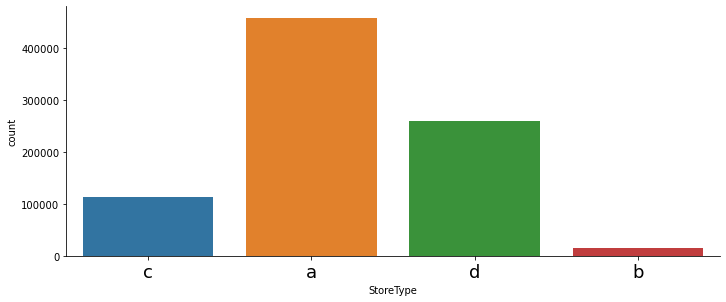

In [8]:
# Store Type

sns.catplot(x='StoreType', kind='count', data=dfRaw1, height=4, aspect=2.5)
plt.xticks(fontsize=18)
plt.show()

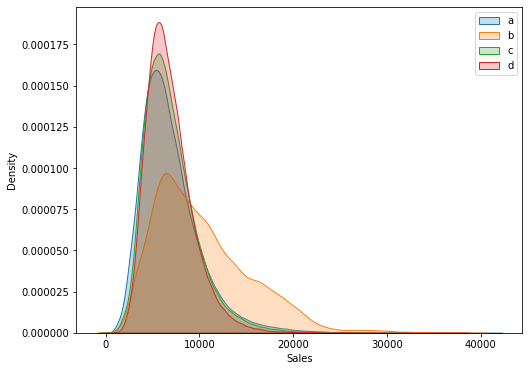

In [9]:
# Store Type

plt.figure(figsize=(8,6))
sns.kdeplot(dfRaw1[dfRaw1['StoreType'] == 'a']['Sales'], label='a', shade=True)
sns.kdeplot(dfRaw1[dfRaw1['StoreType'] == 'b']['Sales'], label='b', shade=True)
sns.kdeplot(dfRaw1[dfRaw1['StoreType'] == 'c']['Sales'], label='c', shade=True)
sns.kdeplot(dfRaw1[dfRaw1['StoreType'] == 'd']['Sales'], label='d', shade=True)
plt.legend()

plt.show()

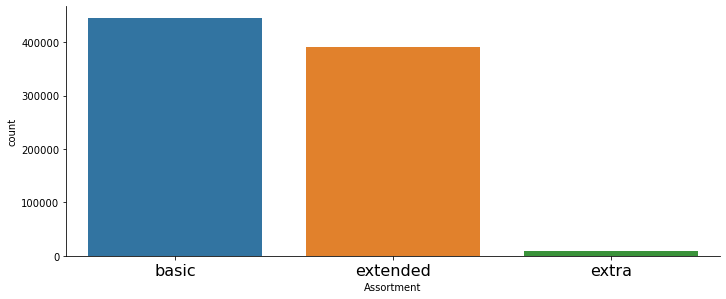

In [10]:
# Store Type

sns.catplot(x='Assortment', kind='count', data=dfRaw1, height=4, aspect=2.5)
plt.xticks(fontsize=16)
plt.show()

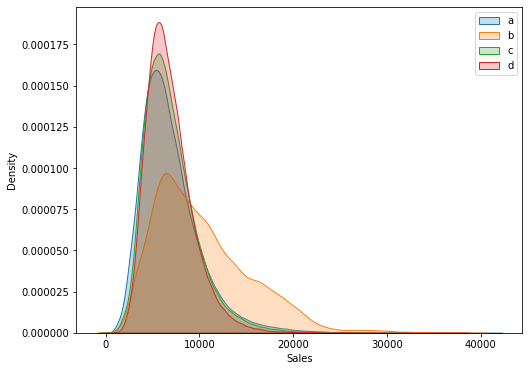

In [11]:
# Store Type

plt.figure(figsize=(8,6))
sns.kdeplot(dfRaw1[dfRaw1['StoreType'] == 'a']['Sales'], label='a', shade=True)
sns.kdeplot(dfRaw1[dfRaw1['StoreType'] == 'b']['Sales'], label='b', shade=True)
sns.kdeplot(dfRaw1[dfRaw1['StoreType'] == 'c']['Sales'], label='c', shade=True)
sns.kdeplot(dfRaw1[dfRaw1['StoreType'] == 'd']['Sales'], label='d', shade=True)
plt.legend()

plt.show()

### Bivariate Analysis

#### H1-Stores with larger assortment should sell more
**FALSE** Stores with larger assortment sell **LESS**

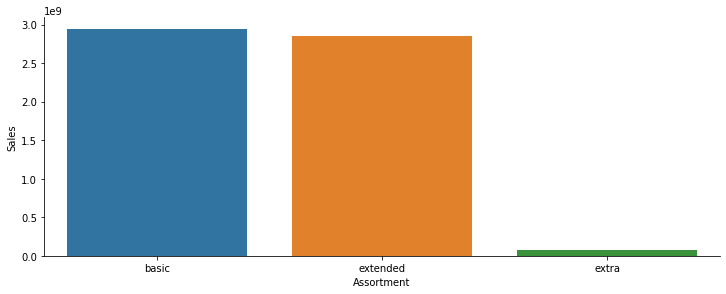

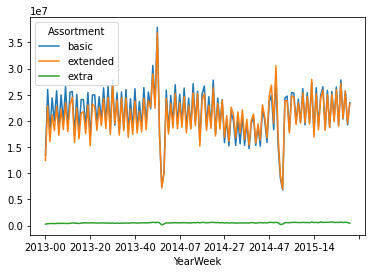

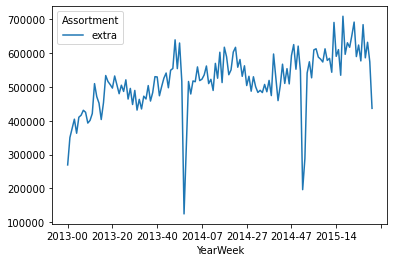

In [12]:
aux1 = dfRaw1[['Assortment', 'Sales']].groupby('Assortment').sum().reset_index()
sns.catplot(x='Assortment', y='Sales', data=aux1, kind='bar', height=4, aspect=2.5);
plt.show()


aux2 = dfRaw1[['YearWeek','Assortment', 'Sales']].groupby(['YearWeek', 'Assortment']).sum().reset_index()
aux2.pivot(index='YearWeek', columns='Assortment', values='Sales').plot()
plt.show()

aux3 = aux2[aux2['Assortment'] == 'extra']
aux3.pivot(index='YearWeek', columns='Assortment', values='Sales').plot()
plt.show()

#### H2-Stores with closer competitors should sell less
**FALSE** Stores with closer competitors sell **MORE**

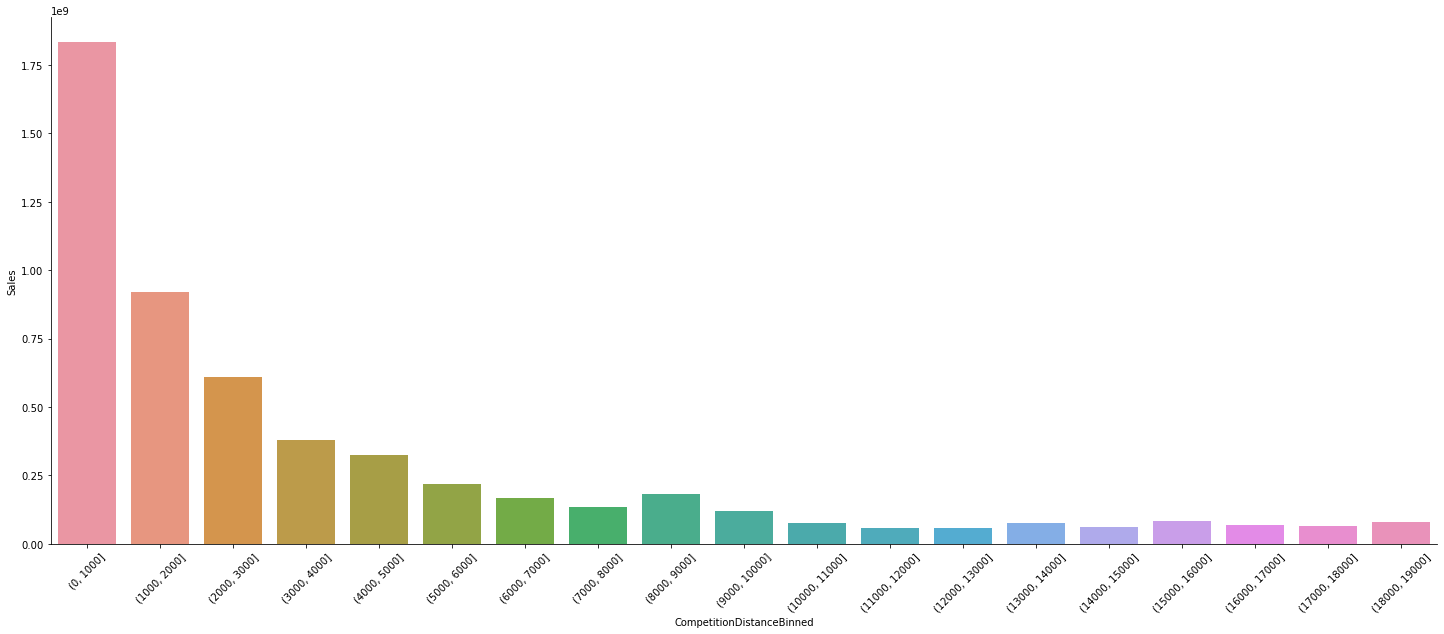

In [13]:
aux1 = dfRaw1[['CompetitionDistance', 'Sales']].groupby('CompetitionDistance').sum().reset_index()
bins = list(np.arange(0, 20000, 1000))
aux1['CompetitionDistanceBinned'] = pd.cut(aux1['CompetitionDistance'], bins=bins)
aux2 = aux1[['CompetitionDistanceBinned', 'Sales']].groupby('CompetitionDistanceBinned').sum().reset_index()
sns.catplot(x='CompetitionDistanceBinned', y='Sales', data=aux2, kind='bar', height=8, aspect=2.5);
plt.xticks(rotation=45)
plt.show()

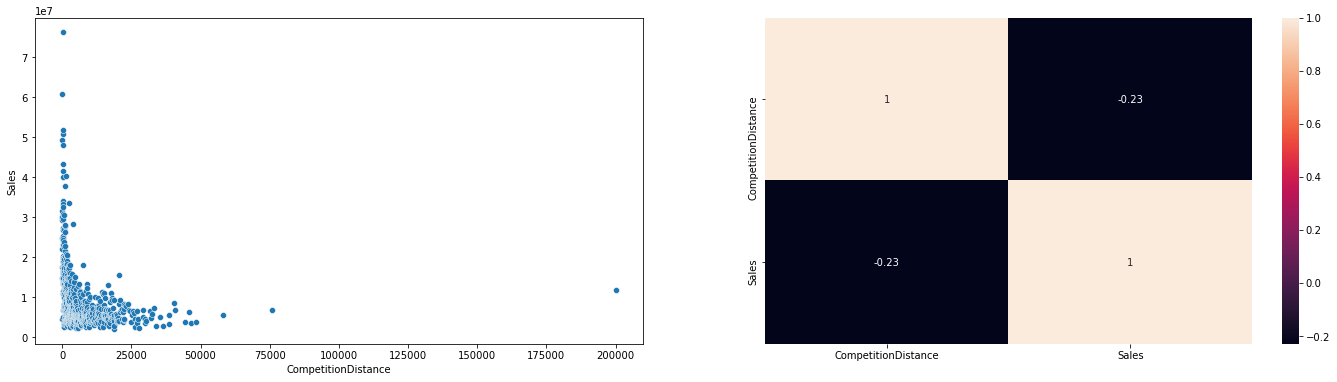

In [14]:
aux1 = dfRaw1[['CompetitionDistance', 'Sales']].groupby('CompetitionDistance').sum().reset_index()

plt.figure(figsize = (24, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='CompetitionDistance', y='Sales', data=aux1)

plt.subplot(1, 2, 2)
sns.heatmap(aux1.corr(method='pearson'), annot=True)
plt.show()

#### H3-Stores with longer competitors should sell more
**FALSE** Stores with longer competitors sell **LESS**

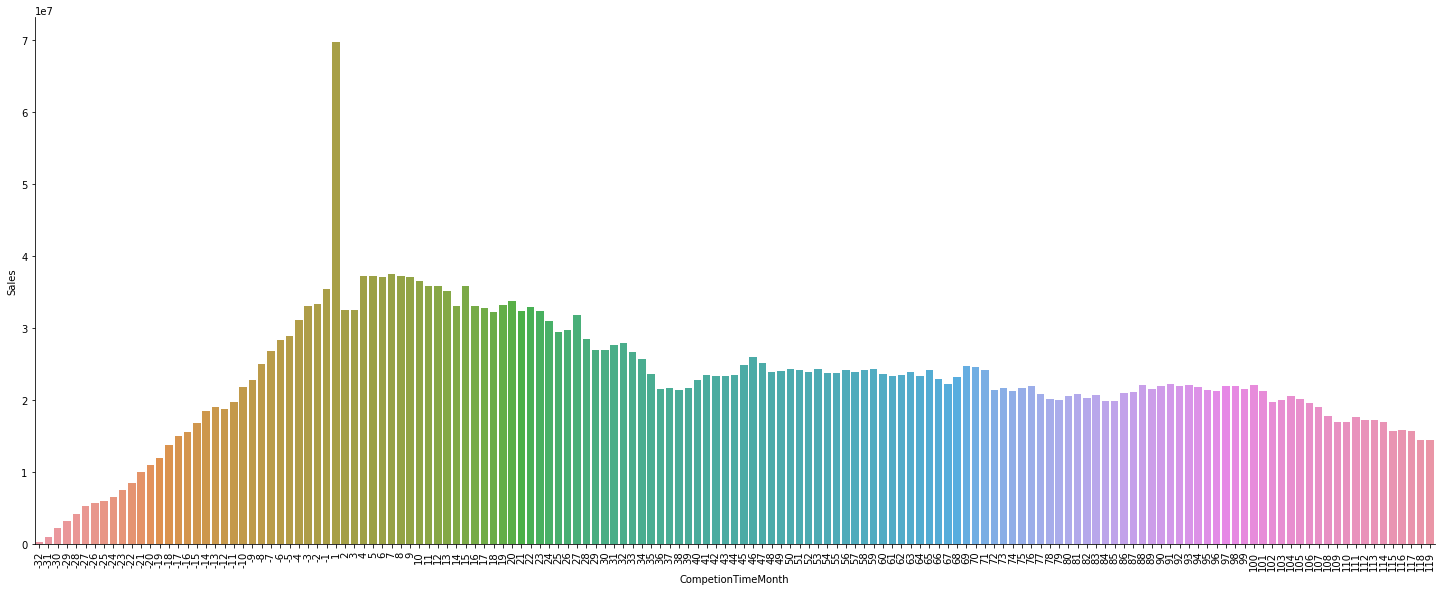

In [15]:
aux1 = dfRaw1[['CompetionTimeMonth', 'Sales']].groupby('CompetionTimeMonth').sum().reset_index()
aux2 = aux1[(aux1['CompetionTimeMonth'] < 120) & (aux1['CompetionTimeMonth'] != 0)]
sns.catplot(x='CompetionTimeMonth', y='Sales', data=aux2, kind='bar', height=8, aspect=2.5);
plt.xticks(rotation=90)
plt.show()

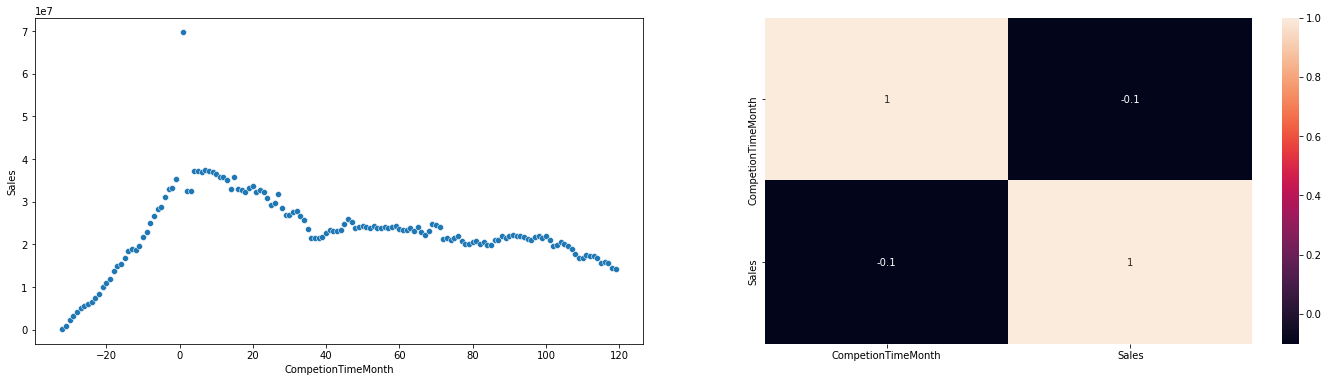

In [16]:
aux1 = dfRaw1[['CompetionTimeMonth', 'Sales']].groupby('CompetionTimeMonth').sum().reset_index()
aux2 = aux1[(aux1['CompetionTimeMonth'] < 120) & (aux1['CompetionTimeMonth'] != 0)]

plt.figure(figsize = (24, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='CompetionTimeMonth', y='Sales', data=aux2)

plt.subplot(1, 2, 2)
sns.heatmap(aux1.corr(method='pearson'), annot=True)
plt.show()

#### H4-Stores with active promotions for longer should sell more
**FALSE** Stores with active promotions for longer sell **LESS**

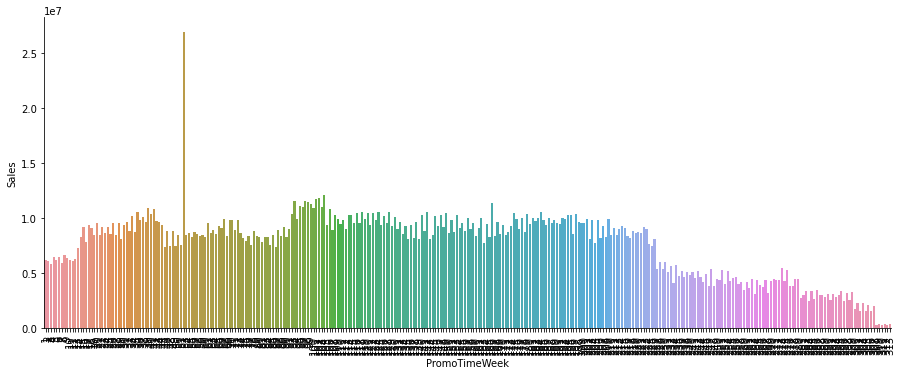

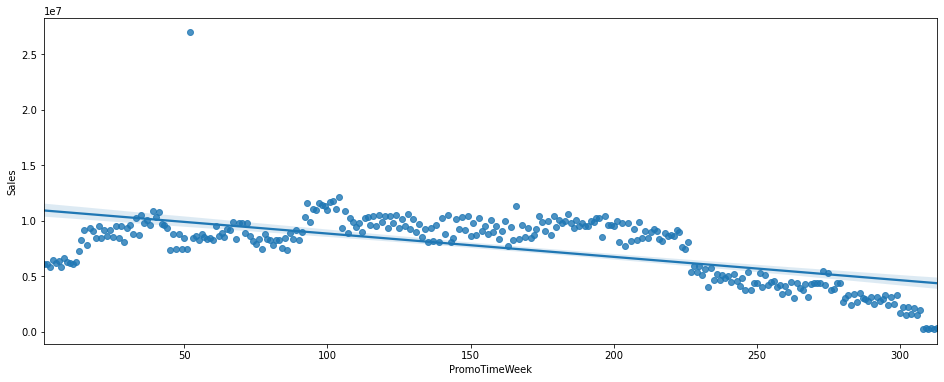

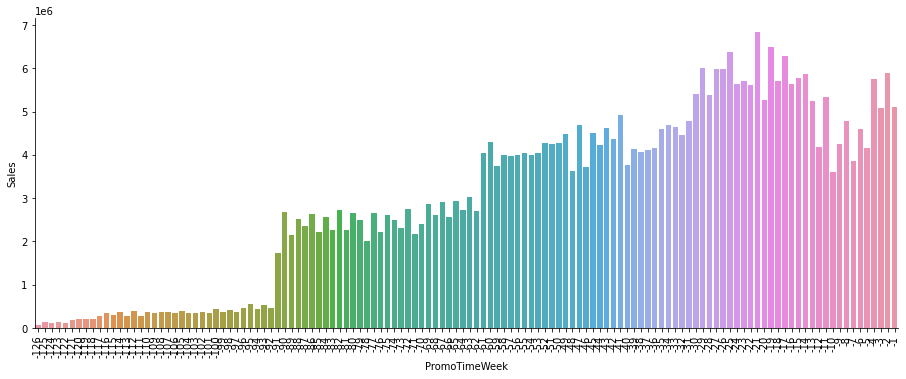

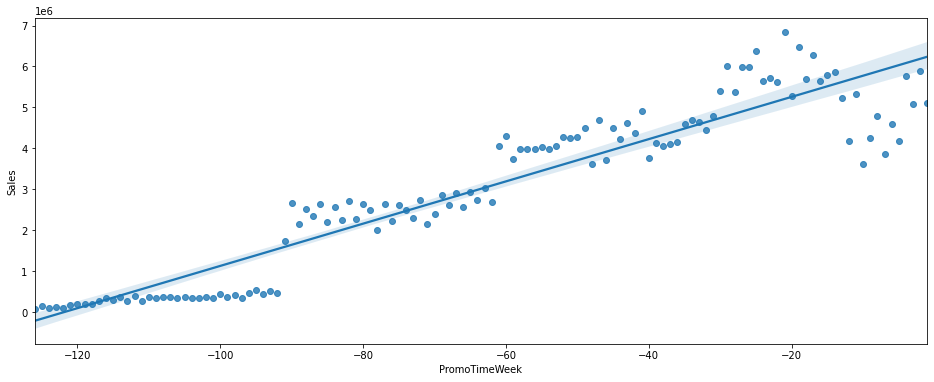

In [17]:
aux1 = dfRaw1[['PromoTimeWeek', 'Sales']].groupby('PromoTimeWeek').sum().reset_index()

aux2 = aux1[aux1['PromoTimeWeek'] > 0] #Promo Extended
sns.catplot(x='PromoTimeWeek', y='Sales', data=aux2, kind='bar', height=5, aspect=2.5);
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(16,6))
sns.regplot(x='PromoTimeWeek', y='Sales', data=aux2);
plt.show()

aux3 = aux1[aux1['PromoTimeWeek'] < 0] #Promo Regular
sns.catplot(x='PromoTimeWeek', y='Sales', data=aux3, kind='bar', height=5, aspect=2.5);
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(16,6))
sns.regplot(x='PromoTimeWeek', y='Sales', data=aux3);
plt.show()

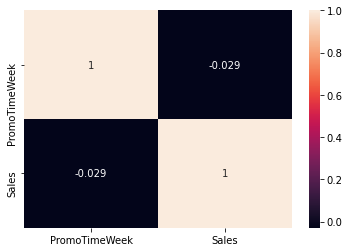

In [18]:
sns.heatmap(aux1.corr(method='pearson'), annot=True)
plt.show()

#### ~~H5-Stores with more days of promotion should sell more~~

#### H6-Stores with consecutive promotions should sell more
**FALSE** Stores with consecutive promotions sell **LESS**

In [19]:
dfRaw1[['Promo', 'Promo2', 'Sales']].groupby(['Promo', 'Promo2']).sum().reset_index()

,Promo,Promo2,Sales
0,0,0,1482612096
1,0,1,1289362241
2,1,0,1628930532
3,1,1,1472275754


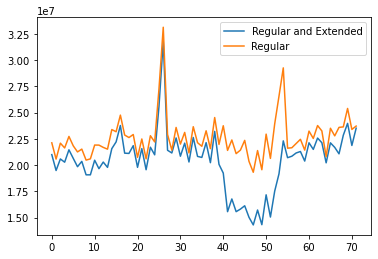

In [20]:
aux1 = dfRaw1[(dfRaw1['Promo'] == 1) & (dfRaw1['Promo2'] == 1)][['YearWeek', 'Sales']].groupby('YearWeek').sum().reset_index()
ax = aux1.plot()

aux2 = dfRaw1[(dfRaw1['Promo'] == 1) & (dfRaw1['Promo2'] == 0)][['YearWeek', 'Sales']].groupby('YearWeek').sum().reset_index()
aux2.plot(ax=ax)

ax.legend(labels=['Regular and Extended', 'Regular'])

plt.show()

#### H7-Stores should sell more in the second semester
**FALSE** Stores sell **LESS** in the second semester

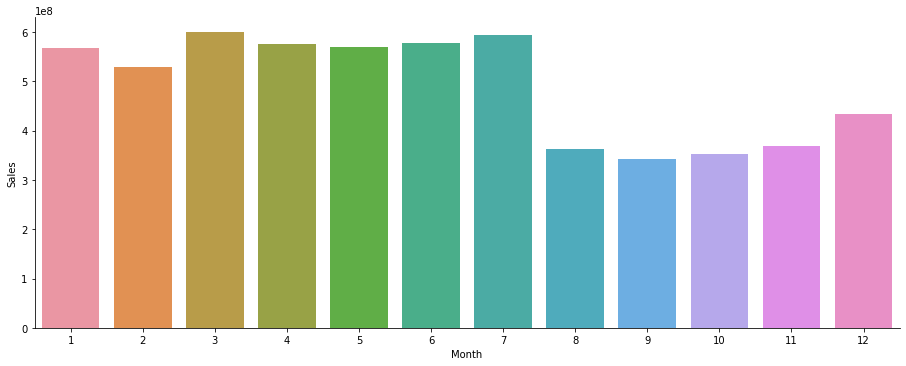

In [39]:
aux1 = dfRaw1[['Month', 'Sales']].groupby('Month').sum().reset_index()
sns.catplot(x='Month', y='Sales', data=aux1, kind='bar', height=5, aspect=2.5);
plt.show()

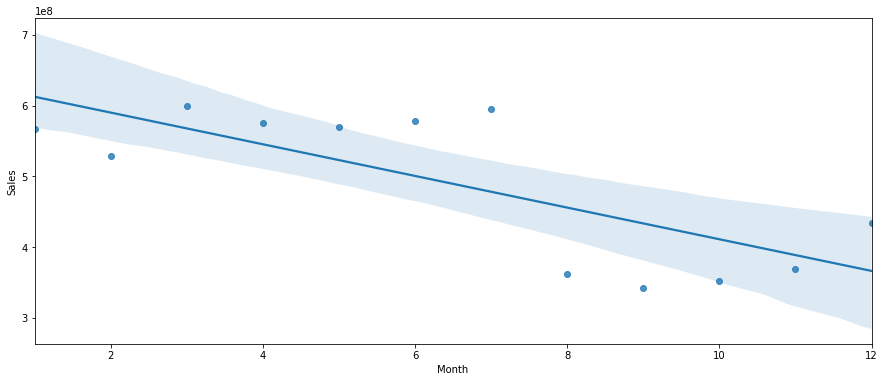

In [40]:
aux1 = dfRaw1[['Month', 'Sales']].groupby('Month').sum().reset_index()
plt.figure(figsize=(15,6))
sns.regplot(x='Month', y='Sales', data=aux1);
plt.show()

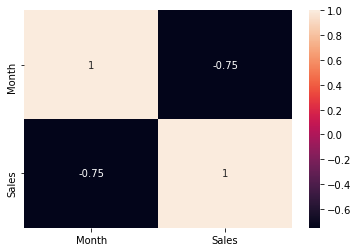

In [41]:
aux1 = dfRaw1[['Month', 'Sales']].groupby('Month').sum().reset_index()
sns.heatmap(aux1.corr(method='pearson'), annot=True)
plt.show()

#### H8-Stores that open on weekends should sell more

#### H9-Stores open during the Christmas holiday should sell more
**FALSE** Stores open during the Christmas holiday sell **LESS**

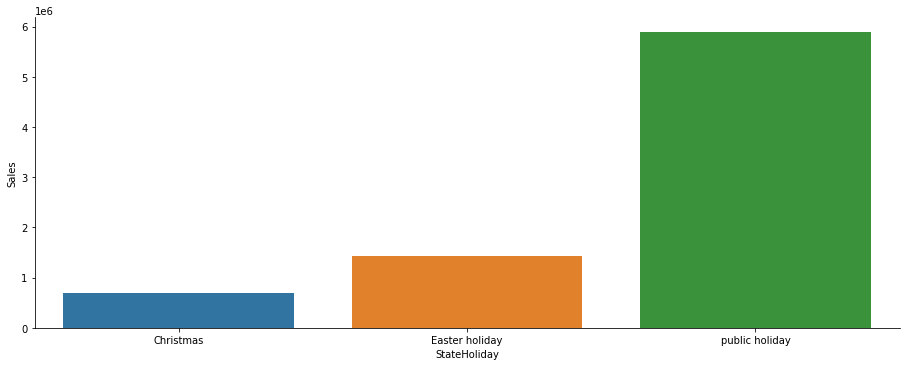

In [27]:
aux = dfRaw1[dfRaw1['StateHoliday'] != 'Regular Day']
aux1 = aux[['StateHoliday', 'Sales']].groupby('StateHoliday').sum().reset_index()
sns.catplot(x='StateHoliday', y='Sales', data=aux1, kind='bar', height=5, aspect=2.5);
plt.show()

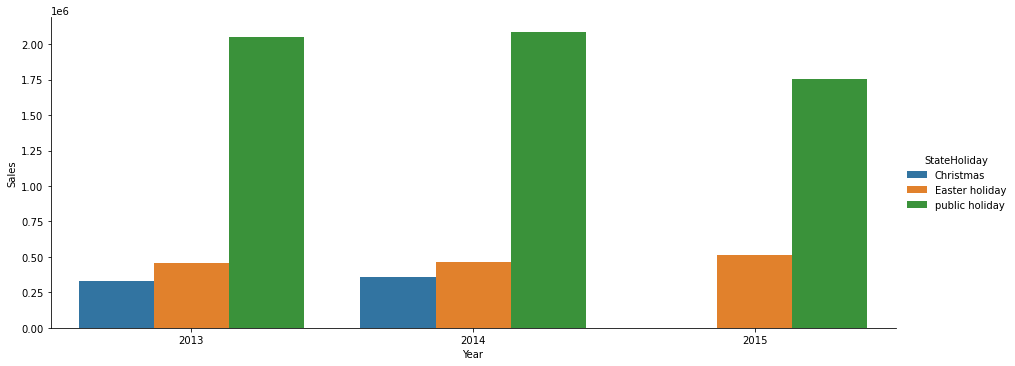

In [25]:
aux = dfRaw1[dfRaw1['StateHoliday'] != 'Regular Day']
aux1 = aux[['Year', 'StateHoliday', 'Sales']].groupby(['Year', 'StateHoliday']).sum().reset_index()
sns.catplot(x='Year', y='Sales', data=aux1, kind='bar', hue='StateHoliday', height=5, aspect=2.5);

#### H10-Stores should sell more over the years
**FALSE** Stores sell **LESS** over the years

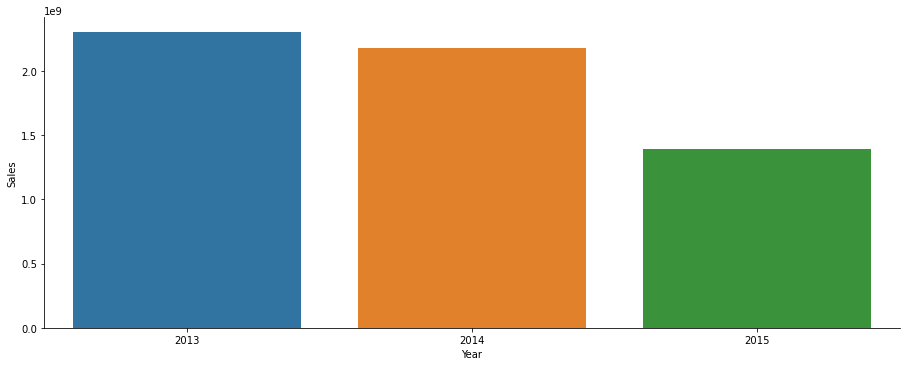

In [28]:
aux1 = dfRaw1[['Year', 'Sales']].groupby('Year').sum().reset_index()
sns.catplot(x='Year', y='Sales', data=aux1, kind='bar', height=5, aspect=2.5);
plt.show()

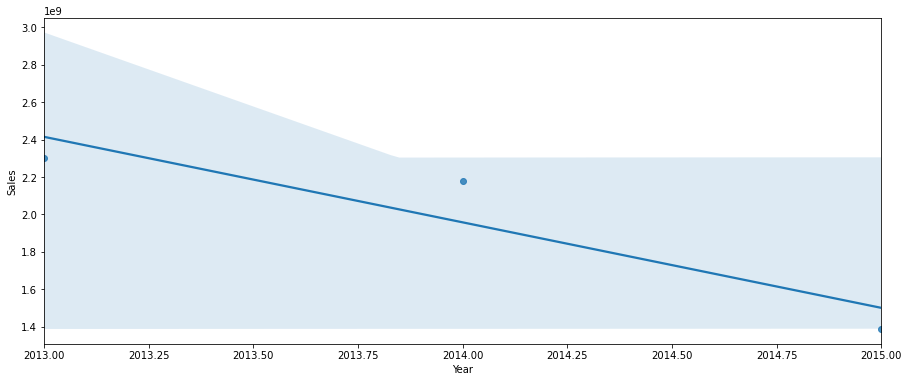

In [37]:
aux1 = dfRaw1[['Year', 'Sales']].groupby('Year').sum().reset_index()
plt.figure(figsize=(15,6))
sns.regplot(x='Year', y='Sales', data=aux1);
plt.show()

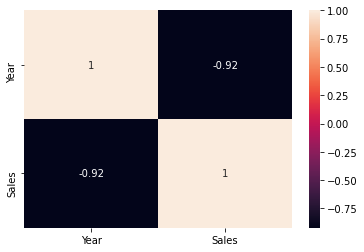

In [38]:
aux1 = dfRaw1[['Year', 'Sales']].groupby('Year').sum().reset_index()
sns.heatmap(aux1.corr(method='pearson'), annot=True)
plt.show()

In [21]:
dfRaw1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'IsPromo', 'Year', 'Month', 'Day',
       'WeekOfYear', 'YearWeek', 'CompetionSinse', 'CompetionTimeMonth',
       'PromoSince', 'PromoTimeWeek'],
      dtype='object')

#### H11-Stores should sell more after the 10th of each month

#### H12-Stores should sell less during school holidays